# 10장 시계열(Time series)

o 시간상의 여러지점을 관측하거나 측정한 값들의 나열
 - 대부분 고정빈도로 표현: 예) 주가(분봉, 일봉 등)
 - 불규칙한 간격으로 표현하는 것도 가능
 
o 시계열의 유형
 - 시간내에서 특정 순간의 타임스탬프
 - 2007년 1월이나 2010년 전체 같은 고정된 기간
 - 시작과 끝 타임스탬프로 표시되는 시간 간격. 
 - 실험 혹은 경과시간
 
o pandas는  표준 시계열 도구와 데이터 알고리즘을 제공 

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## 10.1 날짜, 시간자료형, 도구

o 파이썬 표준 라이브러리
 - 날짜,시간, 달력 관련 기능 제공: datetime, time, calendar

o datetime 모듈
 - https://docs.python.org/3/library/datetime.html
 - two kinds of date and time objects: 
   - aware: 응용 알고리즘, 정치적 타임조정(시간대, 섬머타임제 등), 시간대, 섬머타임제 등의 정보가 포함된 tzinfo 객체가 함께 주어져야 함.
   - naive: UTC기반으로 조정된 시간, 지역시간, 다른 시간대의 시간 (aware와 같은 기능과 대비), 
 - available types
   - class datetime.date: An idealized naive date, assuming the current Gregorian calendar always was, and always will be, in effect. Attributes: year, month, and day.
   - class datetime.time: An idealized time, independent of any particular day, assuming that every day has exactly 24*60*60 seconds (there is no notion of “leap seconds” here). Attributes: hour, minute, second, microsecond, and tzinfo.
   - class datetime.datetime: A combination of a date and a time. Attributes: year, month, day, hour, minute, second, microsecond, and tzinfo.
   - class datetime.timedelta: A duration expressing the difference between two date, time, or datetime instances to microsecond resolution.
   - class datetime.tzinfo: An abstract base class for time zone information objects. These are used by the datetime and time classes to provide a customizable notion of time adjustment (for example, to account for time zone and/or daylight saving time).
   - class datetime.timezone: A class that implements the tzinfo abstract base class as a fixed offset from the UTC.  

o datetime.datetime
 - https://docs.python.org/3/library/datetime.html#datetime-objects 
 - See Constructor, memberfunctions

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2018, 5, 23, 3, 2, 58, 803000)

In [4]:
now.year, now.month, now.day

(2018, 5, 23)

#### o class datetime.timedelta
 - https://docs.python.org/3/library/datetime.html#timedelta-objects
 - it represents a duration, the difference between two dates or times.
 - See: 위 링크의 연산자 테이블 참조 
 - 표현: 내부 저장방식으로 표현 - 즉, days, seconds, microseconds, milliseconds

In [5]:
# delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta = datetime(2011, 1, 9, 2,0, 10, 20) - datetime(2011, 1, 8, 1,0)
delta

datetime.timedelta(1, 3610, 20)

In [6]:
delta.days

1

In [7]:
delta.seconds

3610

In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

#### 문제 10.1 (1) 오늘 기준 20일전 날짜를 구하라. ? 

In [10]:
result=datetime.now()
result-timedelta(20)

datetime.datetime(2018, 5, 3, 3, 2, 58, 935000)

### 10.1.1 문자열과 datetime 간의 변환 

In [11]:
stamp = datetime(2011, 1, 3)

In [12]:
str(stamp)

'2011-01-03 00:00:00'

#### o datetime/date/time.strftime(format)
 - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
 - they support a strftime(format) method, to create a string representing the time under the control of an explicit format string.
 - See str format table in the above link page.

In [13]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

#### o datetime/date/time.strptime(date_string, format)
 - 최고의 날짜 parser, 하지만 매번 포맷을 전달해야하는 불편함. -> dateuitil.parser 이용 가능
 - they creates a datetime/date/time objects from a string representing a date and time and a corresponding format string 
 - See str format table in the above link page.

In [14]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

#### o dateutil.parser
- parser.parse(parserinfo=None, **kwargs) : parse 
- https://dateutil.readthedocs.io/en/stable/parser.html

In [16]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [18]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [19]:
datestrs

['7/6/2011', '8/6/2011']

In [20]:
import datetime
a = datetime.datetime.now()
a = a + datetime.timedelta(days=100)
a.strftime("%Y-%m-%d-%a")

'2018-08-31-Fri'

#### o pd.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=False)
 - DataFrame에서 많이 사용하는 DatatimeIndex로 변환

In [21]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

#### o NaT : Time에서의 null 값

In [22]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
idx[2]

NaT

In [24]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

#### 문제  10.1.1 2018.5.30 다음날의  요일을 구하라 !


## 10.2. 시계열 기초

o pandas의 흔한 타임시르즈: 타임스탬프로 색인화된 Series 

In [25]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.675918
2011-01-05   -0.635133
2011-01-07    0.564271
2011-01-08   -0.084282
2011-01-10   -0.748522
2011-01-12    0.850517
dtype: float64

In [26]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [27]:
# 자동으로 인덱스가 DateTimeIndex로 설정됨. 
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [28]:
# 자동으로 시계열의 연산은 DateTimeIndex에 맞춰 연결됨 
# [::2]
ts + ts[::2]

2011-01-02   -1.351835
2011-01-05         NaN
2011-01-07    1.128542
2011-01-08         NaN
2011-01-10   -1.497044
2011-01-12         NaN
dtype: float64

In [29]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [30]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### 10.2.1 인덱싱, 선택, 부분선택(Indexing, selection, subsetting)

In [31]:
# 기존 Series와 동일하게 사용
stamp = ts.index[2]
ts[stamp]

0.56427123768411458

In [32]:
ts['1/10/2011']

-0.74852188532664465

In [33]:
ts['20110110']

-0.74852188532664465

#### o pd.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html
 - Return a fixed frequency DatetimeIndex.


In [34]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.037364
2000-01-02    0.722358
2000-01-03    0.229721
2000-01-04   -0.216493
2000-01-05    0.208586
2000-01-06    0.243454
                ...   
2002-09-21    0.161646
2002-09-22   -0.078152
2002-09-23    0.378158
2002-09-24    0.937166
2002-09-25   -0.064179
2002-09-26   -1.488312
Freq: D, Length: 1000, dtype: float64

In [35]:
# 연만 넘겨서 슬라이싱 가능 
longer_ts['2001']

2001-01-01   -0.228908
2001-01-02    1.383703
2001-01-03   -0.308197
2001-01-04    0.124884
2001-01-05   -0.305662
2001-01-06   -1.873257
                ...   
2001-12-26    0.166369
2001-12-27   -1.107146
2001-12-28    0.647079
2001-12-29    0.470265
2001-12-30   -0.205297
2001-12-31   -0.972561
Freq: D, Length: 365, dtype: float64

In [36]:
# 연월만 넘겨서 슬라이싱 가능 
longer_ts['2001-05']

2001-05-01    0.108238
2001-05-02    0.538674
2001-05-03    1.889383
2001-05-04    0.351567
2001-05-05   -0.462395
2001-05-06    0.308759
                ...   
2001-05-26   -0.762817
2001-05-27   -0.077304
2001-05-28    1.093492
2001-05-29    1.272084
2001-05-30    0.485982
2001-05-31   -0.624075
Freq: D, Length: 31, dtype: float64

In [37]:
# 날짜 색인으로 데이터 접근
ts[datetime(2011, 1, 7):]

2011-01-07    0.564271
2011-01-08   -0.084282
2011-01-10   -0.748522
2011-01-12    0.850517
dtype: float64

In [38]:
ts

2011-01-02   -0.675918
2011-01-05   -0.635133
2011-01-07    0.564271
2011-01-08   -0.084282
2011-01-10   -0.748522
2011-01-12    0.850517
dtype: float64

In [39]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.564271
2011-01-08   -0.084282
2011-01-10   -0.748522
dtype: float64

In [40]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.675918
2011-01-05   -0.635133
2011-01-07    0.564271
2011-01-08   -0.084282
dtype: float64

In [41]:
dates = pd.date_range('5/10/2018', periods=100, freq='W-WED') 
# for W-WED:   https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2018']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Colorado,Texas,New York,Ohio
2018-05-16,-0.250658,-0.577535,-0.111523,-0.026919
2018-05-23,0.991397,0.895243,-0.176654,0.292457
2018-05-30,-1.318018,0.596806,-1.419000,-0.877439


#### 문제 10.2 : 다음 주가 데이터를 읽어들이고 다음 물음에 답하라.
- close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)

###### (1) AAPL의 2003년 2월의 평균주가를 구하라.

In [42]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px_all
close_px_all['2003-02']['AAPL'].mean()

7.333684210526316

### 10.2.2 중복된 색인을 갖는 신계열 

In [43]:
# 2000-01-02에 몰려 중복된 예

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [44]:
dup_ts.index.is_unique

False

In [45]:
dup_ts['1/3/2000']  # not duplicated

4

In [46]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [47]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [48]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 10.3 날짜 범위, 빈도, 이동 (Date ranges, Frequencies, and Shifting) 

o pandas는 일반적 시계열은 불규칙한 간격을 갖는 것으로 간주

In [49]:
ts

2011-01-02   -0.675918
2011-01-05   -0.635133
2011-01-07    0.564271
2011-01-08   -0.084282
2011-01-10   -0.748522
2011-01-12    0.850517
dtype: float64

In [50]:
ts.resample('D').asfreq()  # 날짜 단위로 재샘플링

2011-01-02   -0.675918
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.635133
2011-01-06         NaN
2011-01-07    0.564271
2011-01-08   -0.084282
2011-01-09         NaN
2011-01-10   -0.748522
2011-01-11         NaN
2011-01-12    0.850517
Freq: D, dtype: float64

### 10.3.1 날짜범위 생성하기

In [51]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [52]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM') # business month end frequency

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [55]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True) 
# normalize : Normalize start/end dates to midnight before generating date range.

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 10.3.2 빈도와 날짜 오프셋 (Frequencies and Date Offsets) 

In [57]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [58]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [59]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h') # 빈도 시간 표시방법 

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [60]:
Hour(2) + Minute(30)

<150 * Minutes>

In [61]:
pd.date_range('1/1/2000', periods=10, freq='1h30min') # 빈도 표 10-4로 표현 

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### o Week of month dates

In [62]:
# 참고: https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI') # Weekday Of Month(WOM)
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [63]:
rng = pd.date_range('1/1/1900', '2/1/1900', freq='WOM-1SUN')
list(rng)

[Timestamp('1900-01-07 00:00:00', freq='WOM-1SUN')]

### 10.3.3 데이터시프트 (Shifting (leading and lagging) data)

o 데이터를 시간축으로 앞뒤로 이동 --> shift() 메쏘드 

o 일간 변화율 등을 산출할 때 유용

In [64]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.516555
2000-02-29   -0.537465
2000-03-31   -0.041383
2000-04-30    0.378553
Freq: M, dtype: float64

In [65]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.516555
2000-04-30   -0.537465
Freq: M, dtype: float64

In [66]:
ts.shift(-2)

2000-01-31   -0.041383
2000-02-29    0.378553
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [67]:
ts.shift(2, freq='M')

2000-03-31   -0.516555
2000-04-30   -0.537465
2000-05-31   -0.041383
2000-06-30    0.378553
Freq: M, dtype: float64

In [68]:
ts.shift(3, freq='D')

2000-02-03   -0.516555
2000-03-03   -0.537465
2000-04-03   -0.041383
2000-05-03    0.378553
dtype: float64

In [69]:
ts.shift(1, freq='3D')

2000-02-03   -0.516555
2000-03-03   -0.537465
2000-04-03   -0.041383
2000-05-03    0.378553
dtype: float64

In [70]:
ts.shift(1, freq='90T') # T: Minute

2000-01-31 01:30:00   -0.516555
2000-02-29 01:30:00   -0.537465
2000-03-31 01:30:00   -0.041383
2000-04-30 01:30:00    0.378553
Freq: M, dtype: float64

#### o 오프셋만큼 날짜 시프트 ( Shifting dates with offsets)

In [71]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [72]:
now + MonthEnd() # 빈도규칙의 다음 날짜로 이동

Timestamp('2011-11-30 00:00:00')

In [73]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [74]:
offset = MonthEnd()
offset.rollforward(now) # 일다 마지막날로 이동

Timestamp('2011-11-30 00:00:00')

In [75]:
offset.rollback(now) # 이전달의 마지막날로 이동

Timestamp('2011-10-31 00:00:00')

In [76]:
# gropuby에 rollforward 함수를 이용하여 쉽게 그룹화하기 
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.622560
2000-02-29   -0.832076
2000-03-31    0.227362
dtype: float64

In [77]:
ts.resample('M', how='mean')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01-31   -0.622560
2000-02-29   -0.832076
2000-03-31    0.227362
Freq: M, dtype: float64

## 10.4 시간대 다루기 (Time Zone Handling) 

o 시간대: 국제표준시(UTC)를 기준으로 떨어진 오프셋으로 표현
  - 예) 뉴욕 시간대: UTC + 5 (섬머타임제: +4) 
  
o pytz : 전세계 시간대 정보를 모아둔 올슨 데이터베이스를 포함  
 - http://pytz.sourceforge.net/
 

In [78]:
# 시간대 이름 확인
import pytz
# pytz.common_timezones[-5:]
pytz.common_timezones[:]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [79]:
# tzinfo 얻기 
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### 10.4.1 지역화와 변환 (Localization and Conversion)

o pandas의 시계열은 시간대를 엄격히 요구하지 않음. 
 - 예) tzinfo 없이 시계열 생성

In [80]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [81]:
print(ts.index.tz)

None


o 시간대를 지정해서 날짜 범위 생성 가능

In [82]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

o 지역시간으로 변경: tz_localize

o Series.tz_localize(tz, axis=0, level=None, copy=True, ambiguous='raise')
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.tz_localize.html  
 - 지역시간으로 변경 (Localize tz-naive TimeSeries to target time zone)
 - Parameters
  - tz : string or pytz.timezone object

#### 문제 10.3 : AAPL의 매월 첫영업일읭 주가를 구하라. 

In [83]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.048997
2012-03-10 09:30:00+00:00    1.709097
2012-03-11 09:30:00+00:00    0.883406
2012-03-12 09:30:00+00:00    0.652276
2012-03-13 09:30:00+00:00    0.686042
2012-03-14 09:30:00+00:00   -0.981164
Freq: D, dtype: float64

In [84]:
ts_ko = ts.tz_localize('Asia/Seoul')
ts_ko

2012-03-09 09:30:00+09:00   -1.048997
2012-03-10 09:30:00+09:00    1.709097
2012-03-11 09:30:00+09:00    0.883406
2012-03-12 09:30:00+09:00    0.652276
2012-03-13 09:30:00+09:00    0.686042
2012-03-14 09:30:00+09:00   -0.981164
Freq: D, dtype: float64

In [85]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [86]:
# tz가 설정되고 나면, tz_convert 이용해야 함.
# ts_utc.tz_localize('US/Eastern')  # 에러 발생: 
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -1.048997
2012-03-10 04:30:00-05:00    1.709097
2012-03-11 05:30:00-04:00    0.883406
2012-03-12 05:30:00-04:00    0.652276
2012-03-13 05:30:00-04:00    0.686042
2012-03-14 05:30:00-04:00   -0.981164
Freq: D, dtype: float64

In [87]:
ts_eastern = ts.tz_localize('US/Eastern') # ts는 localize 되지 않고, 생성된 객체에서만 tz가 설정됨. 
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.048997
2012-03-10 14:30:00+00:00    1.709097
2012-03-11 13:30:00+00:00    0.883406
2012-03-12 13:30:00+00:00    0.652276
2012-03-13 13:30:00+00:00    0.686042
2012-03-14 13:30:00+00:00   -0.981164
Freq: D, dtype: float64

In [88]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.048997
2012-03-10 15:30:00+01:00    1.709097
2012-03-11 14:30:00+01:00    0.883406
2012-03-12 14:30:00+01:00    0.652276
2012-03-13 14:30:00+01:00    0.686042
2012-03-14 14:30:00+01:00   -0.981164
Freq: D, dtype: float64

In [89]:
# DatetimeIndex에도 tz_localize, tz_convert 보유 
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 10.4.2 시간대 고려해서 timestamp 객체 연산 

o 시계열과 유사하게, timestamp에도 시간대 적용 가능 

In [90]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [91]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

#### o Timestamp 내부 값
 - UTC 1970.1.1 00:00:00를 기준으로 경과한 시간을 나노초까지 기록
 - 이 값은 시간대에 따라 변경되지 않음. 

In [92]:
stamp_utc.value

1299902400000000000L

In [93]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000L

In [94]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [95]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [96]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [97]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 10.4.3 다른 시간대 간의 연상 (Operations between different time zones)

o 내부적으로 UTC 기준으로 저장하므로, 다른 시간대간의 연산의 결과는 UTC

In [98]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.242395
2012-03-08 09:30:00   -0.016298
2012-03-09 09:30:00    2.111852
2012-03-12 09:30:00    0.504529
2012-03-13 09:30:00    1.151281
2012-03-14 09:30:00    0.020206
2012-03-15 09:30:00    0.141888
2012-03-16 09:30:00   -0.261328
2012-03-19 09:30:00   -0.373342
2012-03-20 09:30:00    0.176745
Freq: B, dtype: float64

In [99]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 10.5 기간과 기간연산 (Periods and Period Arithmetic)

o 기간(몇일, 몇개월 등)은 period 클래스로 표현

o 생성: 문자열, 정수, 빈도를 가지고 생성

In [100]:
p = pd.Period(2007, freq='A-DEC') # 12.31로 1년이 끝나는 1년 주기 
# 참고: https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases
p

Period('2007', 'A-DEC')

In [101]:
p + 5

Period('2012', 'A-DEC')

In [102]:
p - 2

Period('2005', 'A-DEC')

In [103]:
pd.Period('2014', freq='A-DEC') - p

7L

In [104]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [105]:
Series(np.random.randn(6), index=rng)

2000-01    1.082040
2000-02   -0.612580
2000-03    1.665728
2000-04    0.960127
2000-05   -0.268449
2000-06   -0.945094
Freq: M, dtype: float64

In [106]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 10.5.1 Period Frequency Conversion

o PeriodIndex.asfreq(freq=None, how='E')
 - Convert the PeriodIndex to the specified frequency freq.
 - Parameters
   - freq : str, a frequency
   - how : str {‘E’, ‘S’}, ‘E’, ‘END’, or ‘FINISH’ for end, ‘S’, ‘START’, or ‘BEGIN’ for start

In [107]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [108]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

o 6월말 회계마감인 경우

In [109]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [110]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [111]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [112]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.800298
2007    2.058800
2008   -0.543512
2009    0.983416
Freq: A-DEC, dtype: float64

In [113]:
ts.asfreq('M', how='start')

2006-01    0.800298
2007-01    2.058800
2008-01   -0.543512
2009-01    0.983416
Freq: M, dtype: float64

In [114]:
ts.asfreq('B', how='end') # Bis day

2006-12-29    0.800298
2007-12-31    2.058800
2008-12-31   -0.543512
2009-12-31    0.983416
Freq: B, dtype: float64

### 10.5.2 분기 빈도 (Quarterly period frequencies) 

o 분기의 마지막 표기 방법: Q-JAN, Q-DEC 

In [115]:
# 회계연도 마감이 1월인 경우의 4사분기 
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [116]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [117]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [118]:
# 분기 영업일마감일 16:00 timestamp 만들기
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 # (Bisday end), (Minutes, start) 
p4pm

Period('2012-01-30 16:00', 'T')

In [119]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

#### o pandas.period_range(start=None, end=None, periods=None, freq='D', name=None)
 - Return a fixed frequency PeriodIndex, with day (calendar) as the default frequency
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.period_range.html

In [120]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [121]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 10.5.3 타임스탬프와 기간 서로 변환하기 (Converting Timestamps to Periods (and back))

o Series.to_period(freq=None, copy=True)
 - Convert Series from DatetimeIndex to PeriodIndex with desired frequency (inferred from index if not passed)
   
   (DatetimeIndex를 Period Index로 변환) 

In [122]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.090592
2000-02-29   -0.297451
2000-03-31   -0.486287
Freq: M, dtype: float64

In [123]:
pts

2000-01    0.090592
2000-02   -0.297451
2000-03   -0.486287
Freq: M, dtype: float64

In [124]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01    0.408832
2000-01   -0.572653
2000-01    1.492436
2000-02    1.676349
2000-02    0.965013
2000-02    0.351707
Freq: M, dtype: float64

In [125]:
pts = ts.to_period()
pts

2000-01    0.090592
2000-02   -0.297451
2000-03   -0.486287
Freq: M, dtype: float64

#### o PeriodIndex.to_timestamp(freq=None, how='start')
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.PeriodIndex.to_timestamp.html
 - Cast to DatetimeIndex
 - Parameters
   - freq : string or DateOffset, optional, Target frequency. The default is ‘D’ for week or longer, ‘S’ otherwise
   - how : {‘s’, ‘e’, ‘start’, ‘end’}   

In [126]:
pts.to_timestamp(how='end')

2000-01-31    0.090592
2000-02-29   -0.297451
2000-03-31   -0.486287
Freq: M, dtype: float64

### 10.5.4 배열을 이용해 PeriodIndex 생성하기 
o 연도와 분기 등이 분리되어 저장되어 있는 경우, PeriodIndex 생성하기 

In [127]:
data = pd.read_csv('ch08/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [128]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [129]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [130]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 10.6 리샘플링과 빈도 변환 (Resampling and Frequency Conversion)
o 다운 샘플링: 상위빈도를 하위빈도로 변환 <- -> 업샘플링

o 업/다운이 아닌 리샘플링: W-WED --> W-FRI 로 변경하는 경우

#### Series.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html
 - Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword
 - Parameters: 주의 - closed default value
  - rule : string, 
    - the offset string or object representing target conversion
  - axis : int, optional, default 0
  - closed : {‘right’, ‘left’}
    - Which side of bin interval is closed. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
  - label : {‘right’, ‘left’}
    - Which bin edge label to label bucket with. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
  - convention : {‘start’, ‘end’, ‘s’, ‘e’}
    - For PeriodIndex only, controls whether to use the start or end of rule
  - kind: {‘timestamp’, ‘period’}, optional
    - Pass ‘timestamp’ to convert the resulting index to a DateTimeIndex or ‘period’ to convert it to a PeriodIndex. By default the input representation is retained.
  - loffset : timedelta
    - Adjust the resampled time labels
  - base : int, default 0
    - For frequencies that evenly subdivide 1 day, the “origin” of the aggregated intervals. For example, for ‘5min’ frequency, base could range from 0 through 4. Defaults to 0
  - on : string, optional
    - For a DataFrame, column to use instead of index for resampling. Column must be datetime-like.
  - New in version 0.19.0.
  - level : string or int, optional
    - For a MultiIndex, level (name or number) to use for resampling. Level must be datetime-like.

In [131]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M', how='mean')
# ts.resample('M').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


2000-01-31   -0.282365
2000-02-29    0.237843
2000-03-31    0.181128
2000-04-30   -0.495802
Freq: M, dtype: float64

In [132]:
ts.resample('M', how='mean', kind='period')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01   -0.282365
2000-02    0.237843
2000-03    0.181128
2000-04   -0.495802
Freq: M, dtype: float64

### 10.6.1 Downsampling
o 고려사항
 - 각 간격의 양 끝 중에서 열어둘 쪽
 - 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지의 여부
 

In [133]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [134]:
# closed = left by default
ts.resample('5min', how='sum')
# ts.resample('5min').sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [135]:
# closed = right
ts.resample('5min', how='sum', closed='right')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [136]:
ts.resample('5min', how='sum', closed='right', label='right')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [137]:
ts.resample('5min', how='sum', loffset='-1s')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### o Open-High-Low-Close (OHLC) resampling
 - OHLC: 금융에서 빈번한 시가(Open)-고가(High)-저가(Low)-종가(Close)를 의미
 - how=ohlc : 한번에 데이터프레임 생성 

In [138]:
ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### o Resampling with GroupBy
 - groupby의 aggregation함수로 다운삼플링도 가능

In [139]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [140]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

#### # 문제 10.6.1  다음 주가 데이터를 읽어들인후, AAPL의 주간 OHLC를 구하라.
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)

### 10.6.2 업샘플링(Upsampling)과 보간(interpolation) 

In [141]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.153231,1.312140,0.016201,0.719518
2000-01-12,-1.017601,0.291111,-0.222976,0.337421


In [142]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [143]:
frame.resample('D', fill_method='ffill') # forward fill

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.153231,1.312140,0.016201,0.719518
2000-01-06,-0.153231,1.312140,0.016201,0.719518
2000-01-07,-0.153231,1.312140,0.016201,0.719518
2000-01-08,-0.153231,1.312140,0.016201,0.719518
2000-01-09,-0.153231,1.312140,0.016201,0.719518
2000-01-10,-0.153231,1.312140,0.016201,0.719518
2000-01-11,-0.153231,1.312140,0.016201,0.719518
2000-01-12,-1.017601,0.291111,-0.222976,0.337421


In [144]:
frame.resample('D', fill_method='ffill', limit=2) # limitted forward fill 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.153231,1.312140,0.016201,0.719518
2000-01-06,-0.153231,1.312140,0.016201,0.719518
2000-01-07,-0.153231,1.312140,0.016201,0.719518
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.017601,0.291111,-0.222976,0.337421


In [145]:
frame.resample('W-THU', fill_method='ffill')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-06,-0.153231,1.312140,0.016201,0.719518
2000-01-13,-1.017601,0.291111,-0.222976,0.337421


### o Resampling with periods

In [146]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.322410,-0.769676,-0.052389,0.975496
2000-02,-0.499222,1.048891,0.876587,1.882412
2000-03,2.016453,0.323627,-1.519030,-0.195369
2000-04,0.105951,1.530287,1.362088,1.349680
2000-05,-0.357800,0.700245,0.560354,0.568435


In [147]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000,0.342322,0.169651,-0.201148,0.523939
2001,0.149493,0.279914,0.380323,0.061540


In [148]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill') # december를 마지막 분기 월로 봄, convetion='start' by default, 교재와 반대임.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q1,0.342322,0.169651,-0.201148,0.523939
2000Q2,0.342322,0.169651,-0.201148,0.523939
2000Q3,0.342322,0.169651,-0.201148,0.523939
2000Q4,0.342322,0.169651,-0.201148,0.523939
2001Q1,0.149493,0.279914,0.380323,0.061540
2001Q2,0.149493,0.279914,0.380323,0.061540
2001Q3,0.149493,0.279914,0.380323,0.061540
2001Q4,0.149493,0.279914,0.380323,0.061540


In [149]:
# note: output changed, default value changed from convention='start' to convention='end' 
# also the following cells
annual_frame.resample('Q-DEC', fill_method='ffill', convention='end')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


,Colorado,Texas,New York,Ohio
2000Q4,0.342322,0.169651,-0.201148,0.523939
2001Q1,0.342322,0.169651,-0.201148,0.523939
2001Q2,0.342322,0.169651,-0.201148,0.523939
2001Q3,0.342322,0.169651,-0.201148,0.523939
2001Q4,0.149493,0.279914,0.380323,0.061540


In [150]:
annual_frame.resample('Q-MAR', fill_method='ffill')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q4,0.342322,0.169651,-0.201148,0.523939
2001Q1,0.342322,0.169651,-0.201148,0.523939
2001Q2,0.342322,0.169651,-0.201148,0.523939
2001Q3,0.342322,0.169651,-0.201148,0.523939
2001Q4,0.149493,0.279914,0.380323,0.061540
2002Q1,0.149493,0.279914,0.380323,0.061540
2002Q2,0.149493,0.279914,0.380323,0.061540
2002Q3,0.149493,0.279914,0.380323,0.061540


## 10.7 Time series plotting

o 야후에서 얻은 주식데이터를 이용해 DataFrame 생성 후 간단히 차트 그리기 

In [154]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


####  Series.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
#### DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
- Make plots of DataFrame using matplotlib / pylab
- Parameters:
 - (data : DataFrame) 
 - x : label or position, default None
 - y : label, position or list of label, positions, default None
   - Allows plotting of one column versus another
 - kind : str - ‘line’, ‘bar’, ‘barh’,‘hist’,‘box’, ‘kde’, ‘density’,‘kde’, ‘area’, ‘pie’, ‘scatter’, ‘hexbin’
 - subplots : boolean, default False
   - Make separate subplots for each column
- 주의) Series와 차이점: 
   - DataFrame에는 x, y가 있어, 특정 컬럼과 로우를 지정할 수 있다.
   - subplots, sharex, sharey,  layout, sort_columns : 멀티 컬럼일 경우에 고려해야하는 사항들 존재

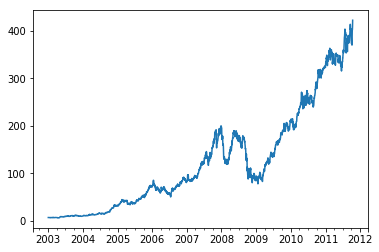

In [200]:
# Series.plot() 호출
close_px['AAPL'].plot()

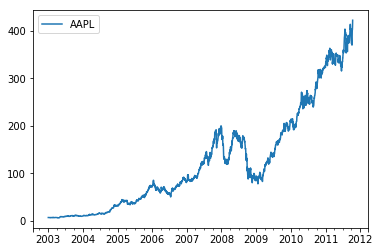

In [201]:
# DataFrame.plot() 호출
close_px.plot(y='AAPL')

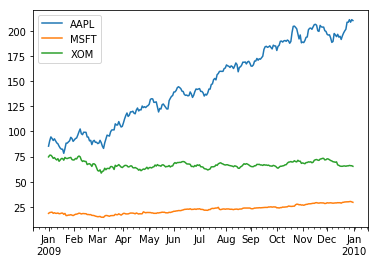

In [202]:
# 특정 연도를 제한하여 3개 컬럼에 대한 그래프 생성 
# close_px.ix['2009'].plot()
close_px.loc['2009'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FEF7CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000104078D0>], dtype=object)

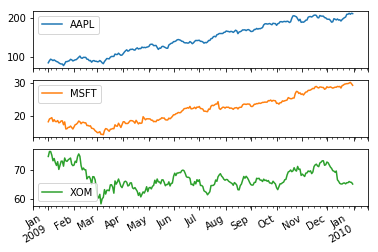

In [203]:
# DataFrame에서 subplots=True 일 경우
close_px.loc['2009'].plot(subplots=True)

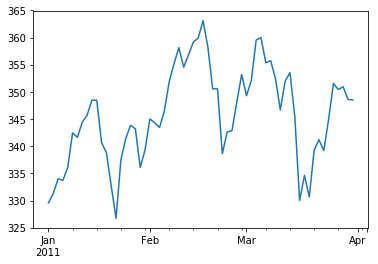

In [206]:
# Series와 DataFrame방식 색인지정 
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

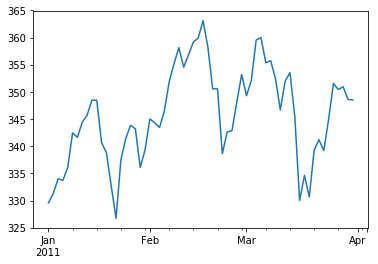

In [208]:
# TimeSeries 방식의 색인 지정
close_px['AAPL']['01-2011':'03-2011'].plot()

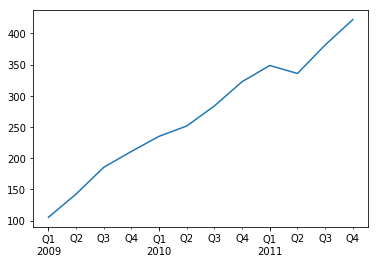

In [210]:
# resample()함수로 사분기단위 그래프 생성
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()
# 주의) appl_q = close_px['AAPL'].resample('Q-DEC') 만은 resampler, ffill()로 Series로 만듬. ffill()없이 plot하면 에러 발생 

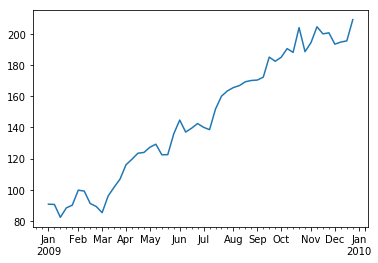

In [216]:
# 문제10.7 (1) AAPL의 2009년 주단위 주가를 boxplot으로 그려라


## 10.8 이동창(Moving window) functions

o 이동창: 데이터의 범위(윈도우)를 이동하며 수행되는 함수 
 - 예) rolling_mean(): 이동평균 - 일정한 윈도구 크기를 갖고 시점을 이동하며 생성한 평균 
 - 이 경우 윈도우의 크기가 가변적일 경우도 포함  
 - 누락된 데이터를 자동으로 배제  
 
o Pandas.rolling_mean : pandas 0.17 버전
 - pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
 - http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html
 - Parameters
  - arg : Series, DataFrame
  - window : int
    - Size of the moving window. This is the number of observations used for calculating the statistic.
  - min_periods : int, default None
    - Minimum number of observations in window required to have a value (otherwise result is NA).
  - freq : string or DateOffset object, optional (default None)
    - Frequency to conform the data to before computing the statistic. Specified as a frequency string or DateOffset object.
  - center : boolean, default False
    - Set the labels at the center of the window.
  - how : string, default ‘None’
    - Method for down- or re-sampling
    
o Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None) : 0.18버전 부터 
  - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
  
o DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None) : 0.18버전 부터 
  - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
  - Provides rolling window calculations : 
  - Parameters
    - window : int, or offset
      - Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size. If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes. This is new in 0.19.0
    - min_periods : int, default None
      - Minimum number of observations in window required to have a value (otherwise result is NA). For a window that is specified by an offset, this will default to 1.
    - center : boolean, default False
      - Set the labels at the center of the window.
    - win_type : string, default None
      - Provide a window type. If None, all points are evenly weighted. See the notes below for further information.
  - Returns
    - a Window or Rolling sub-classed for the particular operation 
    - 이동평균: returned_object.mean(), 이동합. returned_object.sum()
    
o Rolling.apply(func, raw=None, args=(), kwargs={})
  - rolling function apply, which return one scholar values for one window like mean(), sum()   

In [228]:
close_px = close_px.asfreq('B').fillna(method='ffill')

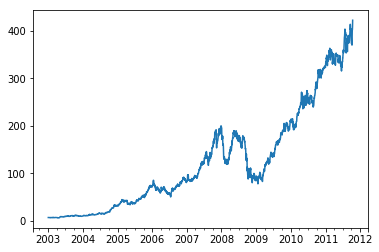

In [229]:
close_px.AAPL.plot()

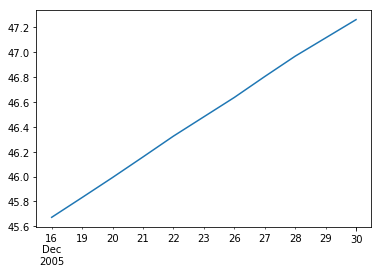

In [239]:
# pd.rolling_mean(close_px.AAPL, 250).plot()
# close_px.AAPL.rolling(window=250).mean().plot() # version 0.18버전부터 권장 

In [232]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

#### o pandas.rolling_std(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs) : ver 0.17
#### o Rolling.std(ddof=1, *args, **kwargs): new in ver 0.18
 - Calculate rolling standard deviation
 - Parameters
  - ddof : int, default 1
   - Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements.
 - Returns
  - Series or DataFrame
  
#### rolling의 초기 Null값 발생 처리 필요
 - rolling window 크기 동안은 NULL 값 발생. (아래 1~3 번째 블록 실행)
 - 윈도우 크기를 가변적으로 하는 함수를 제공하여, 전체 범위의 값을 산출하도록 조정할 수 있음 (아래 4~6번째 블록)

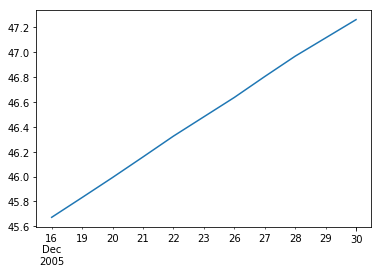

In [244]:
# 250일동안 이동평균 없음.
close_px['2005'].AAPL.rolling(window=250).mean().plot()

In [245]:
# min-1 동안 이동평균 없음.
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
# appl_std250 = pd.rollingclose_px.AAPL, 250, min_periods=10).std()  # for new pandas ver 0.18 or later
appl_std250[:12]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=10,window=250,center=False).std()
  


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

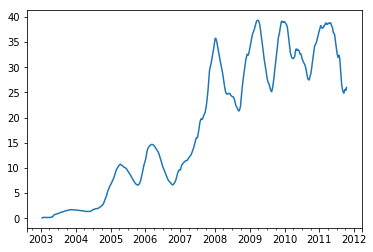

In [248]:
appl_std250.plot()
# appl_std250['2003'].plot() # 초기 NULL 값이 없음을 확인하는 그래프 

In [249]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  """Entry point for launching an IPython kernel.


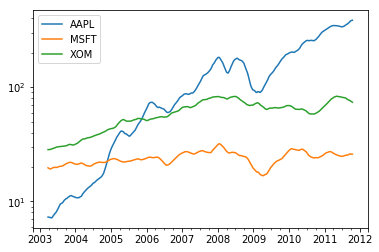

In [260]:
pd.rolling_mean(close_px, 60).plot(logy=True)  # logy:  y-axis에 log scale을 사용

In [261]:
# 문제 10.7 (2) 바로 위 내용을 0.18 버전으로 변경해보라.

In [262]:
plt.close('all')

### 10.8.1 지수가중함수(Exponentially-weighted functions)

o 최근 데이터에 가중치를 둘 필요성이 있는 경우

o Exponential Weighted Moving Average (EWMA)
  - 현재 시간으로 멀어짐에 따라, 지수함수 적으로 가중치가 떨어지는 이동평균 
  - https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average

o pandas.ewma(arg, com=None, span=None, halflife=None, min_periods=0, freq=None, adjust=True, how=None, ignore_na=False): ver 0.17
 - http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.ewma.html
 
o Series.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0): new in ver 0.18
 - Provides exponential weighted functions
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.ewm.html
 - Parameters":
   - span: window size

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=50,window=60,center=False).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
  import sys


Text(0.5,1,'Exponentially-weighted MA')

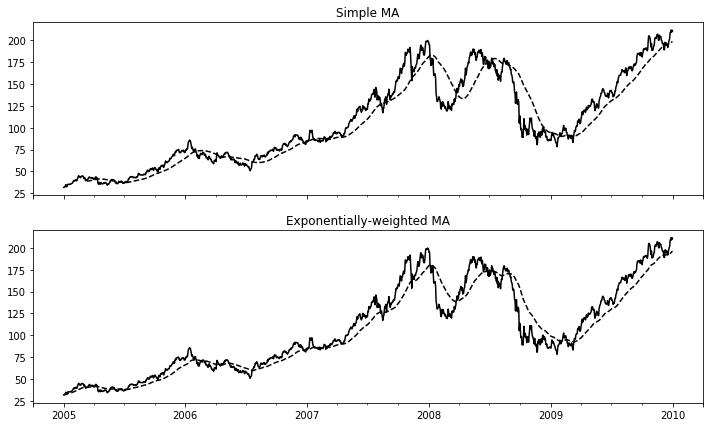

In [278]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [279]:
# 10.8.1 문제 (1) 위이 경고를 해결하라

### 10.8.2 이진 이동창 함수 (Binary moving window functions)

o S&P500과 AAPL의 변화율의 상관관계를 구하자. 

In [283]:
close_px_all[:5]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [284]:
spx_px = close_px_all['SPX']

##### o pandas.rolling_corr(arg1, arg2=None, window=None, min_periods=None, freq=None, center=False, pairwise=None, how=None)
#### o Rolling.corr(other=None, pairwise=None, **kwargs)
 - rolling sample correlation
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.window.Rolling.corr.html
 - Parameters
   - other : Series, DataFrame, or ndarray, optional
   - 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=125).corr(other=<Series>)
  This is separate from the ipykernel package so we can avoid doing imports until


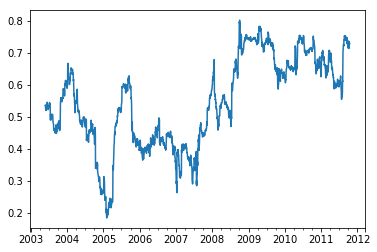

In [289]:
spx_rets = spx_px / spx_px.shift(1) - 1  # spx_rets = spx_px.pct_change() 와 동일
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100) # ver 0.17 style
# corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)  # 0.18 start style
corr.plot()

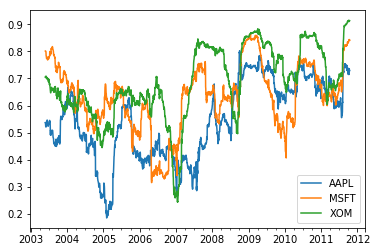

In [291]:
# corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100) # 0.17 start style
corr = returns.rolling(125, min_periods=100).corr(spx_rets)  # 0.18 start style
corr.plot()

### 10.8.3 User-defined moving window functions (사용자 정의 이동창 함수)

o rolling window에 적용할 함수를 개발자가 적용하게 하는 함수 
 - 조건: 적용함수는 rolling window마다 단일값(scholar 값)을 리턴해야 함. 
 
o pandas.rolling_apply(arg, window, func, min_periods=None, freq=None, center=False, args=(), kwargs={}) : ver 0.17 
 - Generic moving function application.
 
o Rolling.apply(func, raw=None, args=(), kwargs={})
 - rolling function apply
 - Parameters
   - func : function
     - Must produce a single value from an ndarray input if raw=True or a Series if raw=False
   - raw : bool, default None
     - False : passes each row or column as a Series to the function.
     - True or None : the passed function will receive ndarray objects instead. If you are just applying a NumPy reduction function this will achieve much better performance.
     
o 백분위 값을 리턴하는 percentileofscore 를 이용하느 사례       

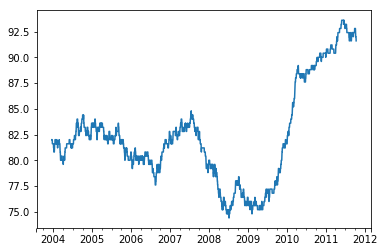

In [293]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)  # 0.17 Style
# result = returns.AAPL.rolling(250).apply(score_at_2percent) @ 0.18 later Style 
result.plot()

In [300]:
# 10.8 문제 (2) AAPL의 rolling window 50 동안의 (최대-최저) 값을 구하여 그래프로 그려라 

## 10.9 Performance and Memory Usage Notes

o pandas는 시계열 데이터에 대해 캐쉬, 메모리 공유 등을 통해 최적화되어 있고, 더욱 개선될 것임.

o 타임스탬프는 64비트(8byte)의 datetime을 사용
o float64를 사용하는 데이터로 대용량의 데이터 생성 : 10M x 16byte = 160MM (rng)

In [294]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000    2.568594
2000-01-01 00:00:00.010   -0.365647
2000-01-01 00:00:00.020   -0.974550
2000-01-01 00:00:00.030   -0.965117
2000-01-01 00:00:00.040   -1.056129
2000-01-01 00:00:00.050   -0.466792
                             ...   
2000-01-02 03:46:39.940    1.372344
2000-01-02 03:46:39.950    0.239655
2000-01-02 03:46:39.960   -1.674677
2000-01-02 03:46:39.970    0.814731
2000-01-02 03:46:39.980   -2.324750
2000-01-02 03:46:39.990    1.571552
Freq: 10L, Length: 10000000, dtype: float64

In [295]:
ts.resample('15min', how='ohlc').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


In [296]:
%timeit ts.resample('15min', how='ohlc')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:257: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


1 loop, best of 3: 173 ms per loop


In [297]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s', how='ohlc')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:257: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


1 loop, best of 3: 257 ms per loop
